## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how = 'outer')
# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
combined['Mouse ID'].nunique()

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicate_mouse_ids = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 



In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_tumor_data = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = regimen_tumor_data.mean()
tumor_median = regimen_tumor_data.median()
tumor_mode = regimen_tumor_data.agg(lambda x: sts.mode(x)[0])
tumor_variance = regimen_tumor_data.var()
tumor_std_dev = regimen_tumor_data.std()
tumor_sem = regimen_tumor_data.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats = pd.DataFrame({
    'Tumor Volume Mean': tumor_mean,
    'Tumor Volume Median': tumor_median,
    'Tumor Volume Mode': tumor_mode,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Standard Deviation': tumor_std_dev,
    'Tumor Volume SEM': tumor_sem
})
tumor_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Mode,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,45.0,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Found how to return first value of Mode here: https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
easy_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,pd.Series.mode,np.var,np.std,sts.sem])
easy_stats

,mean,median,mode,var,std,sem
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,45.0,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


## Bar and Pie Charts

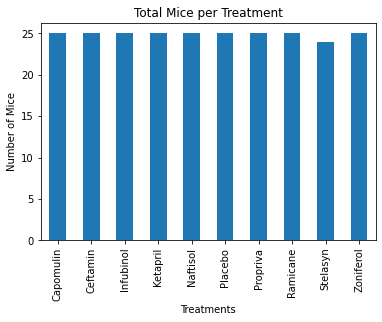

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_counts = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar', title='Total Mice per Treatment')
mice_counts.set_xlabel('Treatments')
mice_counts.set_ylabel('Number of Mice')
plt.show()
plt.tight_layout()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

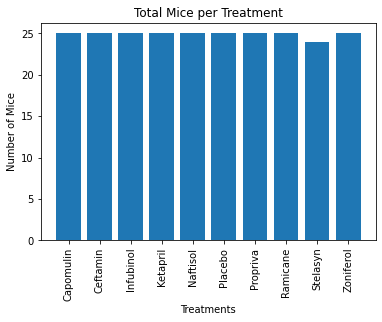

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Found how to sort a unique list here: https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them
treatments = np.sort(clean_df['Drug Regimen'].unique())
plt.bar(treatments, clean_df.groupby('Drug Regimen')['Mouse ID'].nunique(), align='center')
plt.xlabel('Treatments')
plt.ylabel('Number of Mice')
plt.title('Total Mice per Treatment')
plt.xticks(rotation='vertical')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
